In [1]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.foreignexchange import ForeignExchange
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from datetime import datetime, timedelta
import numpy as np

In [2]:
df = pd.read_csv('Bitcoin_tweets.csv')

C:\Users\frank\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_1 = df.copy()

In [9]:
new_date = []
for date in df_1['date']:
    try:
        date = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
        #date = date.round(freq='T')
        new_date.append(date)
    except:
        new_date.append(np.nan)

In [10]:
df_1['date'] = new_date

In [11]:
df_1.dropna(subset=['date'],inplace = True)

In [12]:
df_1.set_index(['date'],inplace=True)

In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1950228 entries, 2021-02-10 23:59:04 to 2021-12-11 20:09:28
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_name         object 
 1   user_location     object 
 2   user_description  object 
 3   user_created      object 
 4   user_followers    float64
 5   user_friends      object 
 6   user_favourites   object 
 7   user_verified     object 
 8   text              object 
 9   hashtags          object 
 10  source            object 
 11  is_retweet        object 
dtypes: float64(1), object(11)
memory usage: 193.4+ MB


In [130]:
def tokenize_words(txt):
    try:
        from nltk.stem import PorterStemmer
        ps = PorterStemmer()
        eiei = txt.split()
        new_text = [ps.stem(t) for t in eiei if t.isalpha()]
        return new_text
    except:
        return None

In [131]:
df_1['cleaned_text'] = [tokenize_words(t) for t in df_1['text']]

In [222]:
creditial = list(df_1)[3:]

In [225]:
creditial.remove('text')
creditial.remove('hashtags')
creditial.remove('source')
creditial.remove('user_created')
creditial

['user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'is_retweet',
 'cleaned_text']

In [132]:
df_1

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,is_retweet,cleaned_text
date,,,,,,,,,,,,,
2021-02-05 11:00:00,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075,361,False,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,"['Bitcoin', 'cryptocurrency', 'bitcoin', 'cryp...",Twitter Web App,False,"[debunk, myth, by]"
2021-02-05 11:00:00,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075,361,False,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,['crypto'],Twitter Web App,False,"[weekend, read, keen, to, learn, about, check,..."
2021-02-05 11:00:00,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075,361,False,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,"['CryptoOutlook', 'cryptocurrency', 'bitcoin',...",Twitter Web App,False,"[bloomberg, LP, with]"
2021-02-05 11:00:00,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075,361,False,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...","['Blockchain', 'cryptocurrency', 'bitcoin', 'c...",Twitter Web App,False,[by]
2021-02-05 11:00:00,Nick Doevendans,"Edam-Volendam, Nederland","Amateur historicus m.n. WW2, schrijver, muziek...",2020-06-12 16:50:07,37.0,123,410,False,#reddcoin #rdd @reddcoin to the moon #altcoin ...,"['reddcoin', 'rdd', 'altcoin', 'turnreddcoinin...",Twitter for iPhone,False,"[to, the, moon]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-12 00:00:00,Saylor Bot,NaN,This bot will tweet @MicroStrategy and @michae...,2021-08-18 05:11:37,44.0,3.0,5.0,False,Michael Saylor's Bitcoin Average: ~$29534\n\nP...,['Bitcoin'],SaylorBot,False,"[michael, bitcoin, bitcoin, total, Bn, learn, ..."
2021-12-12 00:00:00,STUDIO192.NL,Apeldoorn (GLD) Holland,"On-line Radio Station. In Apeldoorn,Holland",2010-01-15 15:57:04,1114.0,622.0,233.0,False,[950] #Glasgow If You Join In At #CryptoTab no...,"['Glasgow', 'CryptoTab', 'Mining', 'Free', 'Li...",TweetDeck,False,"[If, you, join, In, At, you, will, get, speed,..."
2021-12-12 00:00:00,Crypto Pricing,NaN,Given cryptocurrency's current price in USD. P...,2021-03-10 13:17:40,15.0,1.0,421.0,False,Crypto Prices (USD/₿)\n\nBitcoin ➨ $49361.3809...,"['Crypto', 'Bitcoin', 'AxieInfinity', 'VeChain...",Crypto Quote Bot,False,"[crypto, price, bitcoin, axieinfin, vechain, e..."


In [20]:
df_1.sort_index(inplace = True)

In [36]:
def bitcoin_price(date):
    import ccxt
    import time
    exchange = ccxt.binance()
    since = int(time.mktime(date.timetuple())*1000)
    obj = exchange.fetch_ohlcv('BTC/USDT',since=since, limit=1)
    date = datetime.fromtimestamp(float(obj[0][0])/1000)
    return date,obj[0][-2]

In [28]:
df_1.set_index(df_1.index.round('H'),inplace= True)

In [29]:
df_1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,is_retweet,cleaned_text
date,,,,,,,,,,,,,
2021-02-05 11:00:00,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075,361,False,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,"['Bitcoin', 'cryptocurrency', 'bitcoin', 'cryp...",Twitter Web App,False,"[debunking, myths, by]"
2021-02-05 11:00:00,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075,361,False,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,['crypto'],Twitter Web App,False,"[weekend, read, keen, to, learn, about, check,..."
2021-02-05 11:00:00,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075,361,False,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,"['CryptoOutlook', 'cryptocurrency', 'bitcoin',...",Twitter Web App,False,"[bloomberg, lp, with]"
2021-02-05 11:00:00,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075,361,False,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...","['Blockchain', 'cryptocurrency', 'bitcoin', 'c...",Twitter Web App,False,[by]
2021-02-05 11:00:00,Nick Doevendans,"Edam-Volendam, Nederland","Amateur historicus m.n. WW2, schrijver, muziek...",2020-06-12 16:50:07,37.0,123,410,False,#reddcoin #rdd @reddcoin to the moon #altcoin ...,"['reddcoin', 'rdd', 'altcoin', 'turnreddcoinin...",Twitter for iPhone,False,"[to, the, moon]"


In [31]:
df_1.index.unique()

DatetimeIndex(['2021-02-05 11:00:00', '2021-02-05 12:00:00',
               '2021-02-05 13:00:00', '2021-02-05 14:00:00',
               '2021-02-05 15:00:00', '2021-02-05 16:00:00',
               '2021-02-05 17:00:00', '2021-02-05 18:00:00',
               '2021-02-05 19:00:00', '2021-02-05 20:00:00',
               ...
               '2021-11-26 20:00:00', '2021-11-26 21:00:00',
               '2021-11-26 22:00:00', '2021-11-26 23:00:00',
               '2021-11-27 00:00:00', '2021-12-11 20:00:00',
               '2021-12-11 21:00:00', '2021-12-11 22:00:00',
               '2021-12-11 23:00:00', '2021-12-12 00:00:00'],
              dtype='datetime64[ns]', name='date', length=2048, freq=None)

In [32]:
df_index_list = list(df_1.index.unique())

In [33]:
df_index_list[:10]

[Timestamp('2021-02-05 11:00:00'),
 Timestamp('2021-02-05 12:00:00'),
 Timestamp('2021-02-05 13:00:00'),
 Timestamp('2021-02-05 14:00:00'),
 Timestamp('2021-02-05 15:00:00'),
 Timestamp('2021-02-05 16:00:00'),
 Timestamp('2021-02-05 17:00:00'),
 Timestamp('2021-02-05 18:00:00'),
 Timestamp('2021-02-05 19:00:00'),
 Timestamp('2021-02-05 20:00:00')]

In [39]:
btc_price = [bitcoin_price(date) for date in df_index_list]

In [45]:
dtc_price_df = pd.DataFrame(btc_price,columns = ['date','Close price'])
dtc_price_df.set_index(['date'],inplace=True)

In [54]:
btc_return = dtc_price_df.pct_change().dropna()

In [62]:
btc_return_dict = btc_return.to_dict()['Close price']

In [156]:
sum_df = pd.DataFrame()
sum_df['tweets'] =  df_1['cleaned_text']
sum_df

,tweets
date,
2021-02-05 11:00:00,"[debunk, myth, by]"
2021-02-05 11:00:00,"[weekend, read, keen, to, learn, about, check,..."
2021-02-05 11:00:00,"[bloomberg, LP, with]"
2021-02-05 11:00:00,[by]
2021-02-05 11:00:00,"[to, the, moon]"
...,...
2021-12-12 00:00:00,"[michael, bitcoin, bitcoin, total, Bn, learn, ..."
2021-12-12 00:00:00,"[If, you, join, In, At, you, will, get, speed,..."
2021-12-12 00:00:00,"[crypto, price, bitcoin, axieinfin, vechain, e..."


In [135]:
#sum_df.reset_index(inplace=True)

In [79]:
dummy_list = []
for date in sum_df.index:
    try:
        dummy_list.append(btc_return_dict[date])
    except:
        dummy_list.append(np.nan)

In [157]:
sum_df['return1HR'] =  dummy_list
sum_df

,tweets,return1HR
date,,
2021-02-05 11:00:00,"[debunk, myth, by]",NaN
2021-02-05 11:00:00,"[weekend, read, keen, to, learn, about, check,...",NaN
2021-02-05 11:00:00,"[bloomberg, LP, with]",NaN
2021-02-05 11:00:00,[by],NaN
2021-02-05 11:00:00,"[to, the, moon]",NaN
...,...,...
2021-12-12 00:00:00,"[michael, bitcoin, bitcoin, total, Bn, learn, ...",0.003524
2021-12-12 00:00:00,"[If, you, join, In, At, you, will, get, speed,...",0.003524
2021-12-12 00:00:00,"[crypto, price, bitcoin, axieinfin, vechain, e...",0.003524


In [196]:
return_12HR = dtc_price_df.pct_change(12).dropna().to_dict()['Close price']
return_12HR

{Timestamp('2021-02-05 23:00:00'): 0.015093760906476739,
 Timestamp('2021-02-06 00:00:00'): 0.012250511933508346,
 Timestamp('2021-02-06 01:00:00'): 0.021603069555023113,
 Timestamp('2021-02-06 02:00:00'): 0.0005139799609288342,
 Timestamp('2021-02-06 03:00:00'): -0.003349656731146844,
 Timestamp('2021-02-06 04:00:00'): 0.0005154671995195592,
 Timestamp('2021-02-06 05:00:00'): 0.014025367668155653,
 Timestamp('2021-02-06 06:00:00'): 0.00906392474668194,
 Timestamp('2021-02-06 07:00:00'): 0.018383420156986352,
 Timestamp('2021-02-06 08:00:00'): 0.02361661309487384,
 Timestamp('2021-02-06 09:00:00'): 0.012251275989210608,
 Timestamp('2021-02-06 10:00:00'): 0.03558894771939913,
 Timestamp('2021-02-06 11:00:00'): 0.03661421776055995,
 Timestamp('2021-02-06 12:00:00'): 0.03763113795208484,
 Timestamp('2021-02-06 13:00:00'): 0.030125388034480505,
 Timestamp('2021-02-06 14:00:00'): 0.04841138093144215,
 Timestamp('2021-02-06 15:00:00'): 0.04891305939053203,
 Timestamp('2021-02-06 16:00:00'): 

In [197]:
dummy_list = []
for date in sum_df.index:
    try:
        dummy_list.append(return_12HR[date])
    except:
        dummy_list.append(np.nan)

In [198]:
sum_df['return12HR'] =  dummy_list
sum_df

,tweets,return1HR,return2HR,return6HR,return12HR,return24HR
date,,,,,,
2021-02-05 11:00:00,"[debunk, myth, by]",NaN,NaN,NaN,NaN,NaN
2021-02-05 11:00:00,"[weekend, read, keen, to, learn, about, check,...",NaN,NaN,NaN,NaN,NaN
2021-02-05 11:00:00,"[bloomberg, LP, with]",NaN,NaN,NaN,NaN,NaN
2021-02-05 11:00:00,[by],NaN,NaN,NaN,NaN,NaN
2021-02-05 11:00:00,"[to, the, moon]",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-12-12 00:00:00,"[michael, bitcoin, bitcoin, total, Bn, learn, ...",0.003524,0.008592,-0.098025,-0.104463,-0.16744
2021-12-12 00:00:00,"[If, you, join, In, At, you, will, get, speed,...",0.003524,0.008592,-0.098025,-0.104463,-0.16744
2021-12-12 00:00:00,"[crypto, price, bitcoin, axieinfin, vechain, e...",0.003524,0.008592,-0.098025,-0.104463,-0.16744


In [199]:
[1,6,12,24]

[1, 6, 12, 24]

In [226]:
for col in creditial:
    sum_df[col] = df_1[col]

In [227]:
sum_df

,tweets,return1HR,return2HR,return6HR,return12HR,return24HR,user_followers,user_verified,user_friends,user_favourites,is_retweet,cleaned_text
date,,,,,,,,,,,,
2021-02-05 11:00:00,"[debunk, myth, by]",NaN,NaN,NaN,NaN,NaN,301.0,False,1075,361,False,"[debunk, myth, by]"
2021-02-05 11:00:00,"[weekend, read, keen, to, learn, about, check,...",NaN,NaN,NaN,NaN,NaN,301.0,False,1075,361,False,"[weekend, read, keen, to, learn, about, check,..."
2021-02-05 11:00:00,"[bloomberg, LP, with]",NaN,NaN,NaN,NaN,NaN,301.0,False,1075,361,False,"[bloomberg, LP, with]"
2021-02-05 11:00:00,[by],NaN,NaN,NaN,NaN,NaN,301.0,False,1075,361,False,[by]
2021-02-05 11:00:00,"[to, the, moon]",NaN,NaN,NaN,NaN,NaN,37.0,False,123,410,False,"[to, the, moon]"
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-12 00:00:00,"[michael, bitcoin, bitcoin, total, Bn, learn, ...",0.003524,0.008592,-0.098025,-0.104463,-0.16744,44.0,False,3.0,5.0,False,"[michael, bitcoin, bitcoin, total, Bn, learn, ..."
2021-12-12 00:00:00,"[If, you, join, In, At, you, will, get, speed,...",0.003524,0.008592,-0.098025,-0.104463,-0.16744,1114.0,False,622.0,233.0,False,"[If, you, join, In, At, you, will, get, speed,..."
2021-12-12 00:00:00,"[crypto, price, bitcoin, axieinfin, vechain, e...",0.003524,0.008592,-0.098025,-0.104463,-0.16744,15.0,False,1.0,421.0,False,"[crypto, price, bitcoin, axieinfin, vechain, e..."


In [231]:
sum_df.to_csv('cleaned_data.csv')

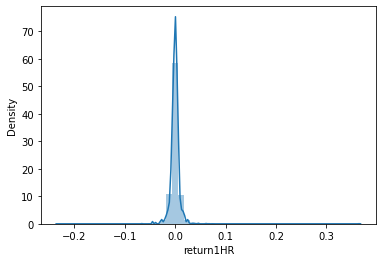

In [216]:
sns.distplot(sum_df['return1HR'])

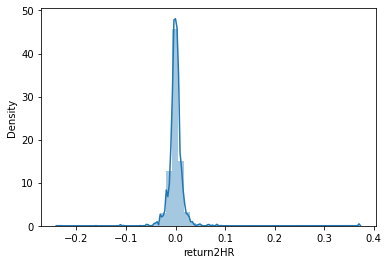

In [217]:
sns.distplot(sum_df['return2HR'])

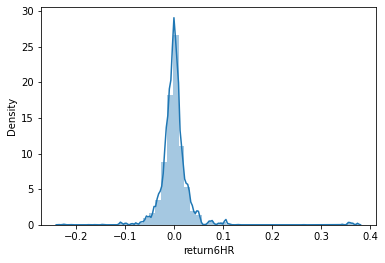

In [218]:
sns.distplot(sum_df['return6HR'])

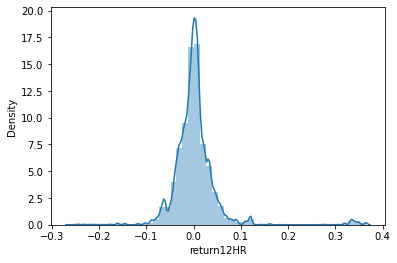

In [219]:
sns.distplot(sum_df['return12HR'])

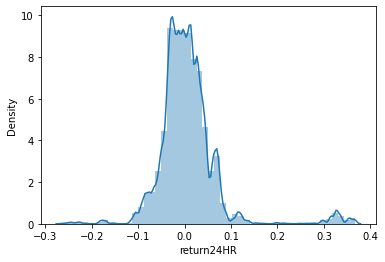

In [220]:
sns.distplot(sum_df['return24HR'])